## Stock Analysis: Random Walk and Forecasting

### 1. Plot the Daily Closing Price of Your Chosen Stock
- Choose a stock ticker (e.g., `AAPL`, `GOOG`, `MSFT`).
- Download its historical daily closing price data for the past year using Yahoo Finance or a similar data provider.
- Plot the daily closing prices of the chosen stock.

### 2. Determine if It Is a Random Walk or Not
- A random walk means that the future value of a time series is based solely on its past value, and the series doesn't show any predictable pattern.
- You can check this by analyzing the autocorrelation (ACF) plot. A random walk should have no significant autocorrelations after the first lag.

### 3. If It Is Not a Random Walk, Explain Why
- If the data shows trends or patterns (e.g., upward or downward movements), it's not a random walk. You can justify this by explaining the trend, cyclical behavior, or any other repeating patterns observed in the data.

### 4. Keep the Last 5 Days of Data as a Test Set
- Split the data into training and test sets. 
- The last 5 days of data will serve as the test set, and the rest will be used for training.

### 5. Forecast the Last 5 Days Using Naive Forecasting Methods, and Measure the MSE
- Use naive forecasting methods (e.g., forecasting the last observed value, using the mean, or using a simple drift method).
- Calculate the Mean Squared Error (MSE) for each forecasting method.

### 6. Plot Your Forecasts
- Plot the actual closing prices, and overlay the forecasts for the last 5 days.
- Use different line styles or colors to differentiate between actual and forecasted values.

### 7. Forecast the Next Timestep Over the Test Set, and Measure the MSE. Did It Decrease?
- Use a simple forecasting method (e.g., forecasting the next value using the last observed value or the drift method) to predict the next timestep.
- Measure the MSE and compare it with the previous MSE to see if the performance improved.

### 8. Plot Your Forecasts
- Plot your forecasted values for the next timestep on the same graph as the actual values.
- Compare the predictions to see how well your model did.


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [48]:
import yfinance as yf

# Define the ticker symbol
ticker_symbol = 'VFV.TO'

# Fetch the data for the past year
vfv_data = yf.download(ticker_symbol, period='1y')

# Display the first few rows of the dataframe
vfv_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,VFV.TO,VFV.TO,VFV.TO,VFV.TO,VFV.TO
Date,,,,,
2024-04-11,124.825630,125.043270,123.608829,124.152929,218800
2024-04-12,123.964973,124.746495,123.529701,124.637675,244100
2024-04-15,122.471184,124.647567,122.273326,124.548642,392200
2024-04-16,122.669029,123.044948,122.332682,122.728383,253000
2024-04-17,121.382980,123.044948,121.382980,123.044948,239100


In [49]:
vfv_data.columns.tolist() # this is a multi index df

[('Close', 'VFV.TO'),
 ('High', 'VFV.TO'),
 ('Low', 'VFV.TO'),
 ('Open', 'VFV.TO'),
 ('Volume', 'VFV.TO')]

In [50]:
# Extract closing prices from column 'Close' for 'VFV.TO'
closing_prices = vfv_data[('Close', 'VFV.TO')].reset_index()

# Rename columns for clarity
closing_prices.columns = ['date', 'close']

closing_prices.head()

,date,close
0,2024-04-11,124.825630
1,2024-04-12,123.964973
2,2024-04-15,122.471184
3,2024-04-16,122.669029
4,2024-04-17,121.382980


In [51]:
closing_prices.shape

(253, 2)

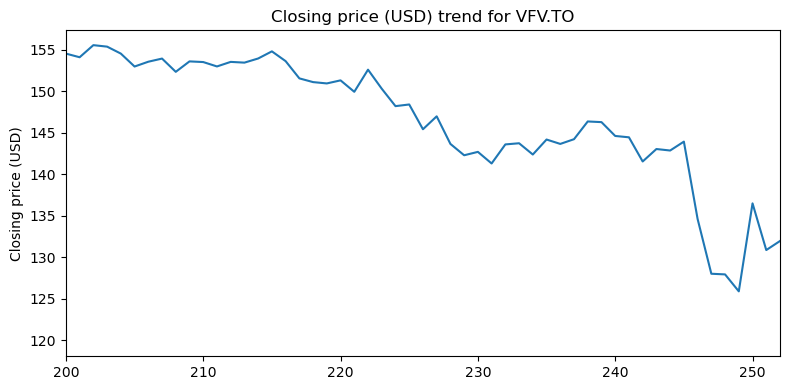

In [52]:
fig, ax = plt.subplots(figsize=(8, 4))

# Plot your data
ax.plot(closing_prices['close'])

# Set axis labels
ax.set_title("Closing price (USD) trend for VFV.TO")
ax.set_xlabel('')
ax.set_ylabel('Closing price (USD)')

plt.xlim(200, 252)
plt.tight_layout()
plt.show()


In [53]:
vfv_ADF_result = adfuller(closing_prices['close'])
print(f'ADF Statistic: {vfv_ADF_result[0]}')
print(f'p-value: {vfv_ADF_result[1]}')

# Result shows the series is not stationary

ADF Statistic: -1.756085709119081
p-value: 0.40247138387706166


In [54]:
# Difference the series
diff_closing_prices = np.diff(closing_prices['close'], n=1)

In [55]:
vfv_diff_ADF_result = adfuller(diff_closing_prices)
print(f'ADF Statistic: {vfv_diff_ADF_result[0]}')
print(f'p-value: {vfv_diff_ADF_result[1]}')

# Result shows the series is stationary after differencing

ADF Statistic: -6.649127391021525
p-value: 5.17425713817556e-09


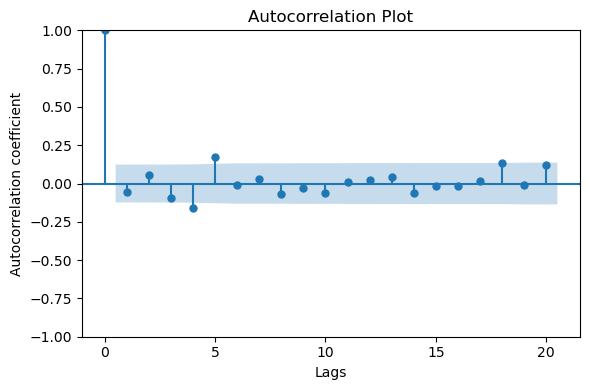

In [56]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_acf(diff_closing_prices, lags=20, ax=ax)

ax.set_xlabel("Lags")
ax.set_ylabel("Autocorrelation coefficient")
ax.set_title("Autocorrelation Plot")

plt.tight_layout()
plt.show()

You will notice that there are no significant autocorrelation coefficients after lag 0. This is a clear indicator that we are dealing with a random walk.This means that the stationary process is completely random and can therefore be described as white noise. Each value is simply a random step away from the previous one, with no relation between them.

In [57]:
# Split into train and test sets
train = closing_prices[:-5]  # All rows except the last 5
test = closing_prices[-5:]   # Last 5 rows only

# Optional: View the splits
print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (248, 2)
Test shape: (5, 2)


In [58]:
test

,date,close
248,2025-04-07,127.940002
249,2025-04-08,125.900002
250,2025-04-09,136.490005
251,2025-04-10,130.869995
252,2025-04-11,131.960007


#### Forecasting random walk using naive methods

In [59]:
# Forecast the historical mean
mean = np.mean(train['close'])
test.loc[:, 'pred_mean'] = mean
test

,date,close,pred_mean
248,2025-04-07,127.940002,139.187007
249,2025-04-08,125.900002,139.187007
250,2025-04-09,136.490005,139.187007
251,2025-04-10,130.869995,139.187007
252,2025-04-11,131.960007,139.187007


In [60]:

# Forecast using the last known value
last_value = train['close'].iloc[-1]
test.loc[:, 'pred_last'] = last_value
test


,date,close,pred_mean,pred_last
248,2025-04-07,127.940002,139.187007,128.020004
249,2025-04-08,125.900002,139.187007,128.020004
250,2025-04-09,136.490005,139.187007,128.020004
251,2025-04-10,130.869995,139.187007,128.020004
252,2025-04-11,131.960007,139.187007,128.020004


In [61]:
# Forecast using the drift
deltaX = len(train)-1    # The deltaX is basically the length of the training set
deltaY = last_value - train['close'].iloc[0]    # Remember to subtract the initial value of the training set

drift = deltaY / deltaX

x_vals = np.arange(248, 253, 1)

pred_drift = drift * x_vals + train['close'].iloc[0]    #A Add the initial value back in the predictions

test.loc[:, 'pred_drift'] = pred_drift

test

,date,close,pred_mean,pred_last,pred_drift
248,2025-04-07,127.940002,139.187007,128.020004,128.032937
249,2025-04-08,125.900002,139.187007,128.020004,128.045870
250,2025-04-09,136.490005,139.187007,128.020004,128.058802
251,2025-04-10,130.869995,139.187007,128.020004,128.071735
252,2025-04-11,131.960007,139.187007,128.020004,128.084668


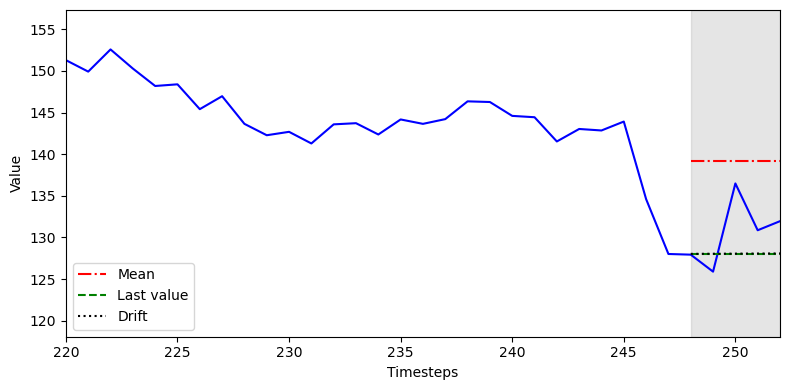

In [62]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(closing_prices['close'], 'b-')
# ax.plot(train['close'], 'b-')
# ax.plot(test['close'], 'b-')
ax.plot(test['pred_mean'], 'r-.', label='Mean')
ax.plot(test['pred_last'], 'g--', label='Last value')
ax.plot(test['pred_drift'], 'k:', label='Drift')

ax.axvspan(248, 252, color='#808080', alpha=0.2)
ax.legend(loc=3)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.xlim(220, 252)
plt.tight_layout()
plt.show()

Forecasting the next timestep of a random walk is the only reasonable situation we can tackle, although we will still use naive forecasting methods. Specifically, we will predict the 
. However, we will make this forecast only for the next timestep. That way, our forecast should only be off by a random number, since the future value of a random walk is always the past value plus white noise. Implementing this method is straightforward: we take our initial observed value and use it to predict the next timestep. Once we record a new value, it will be used as a forecast for the following timestep. This process is then repeated into the future.

In [63]:
# Forecast the next timestep using last known value approach
closing_prices_shift = closing_prices.shift(periods=1)

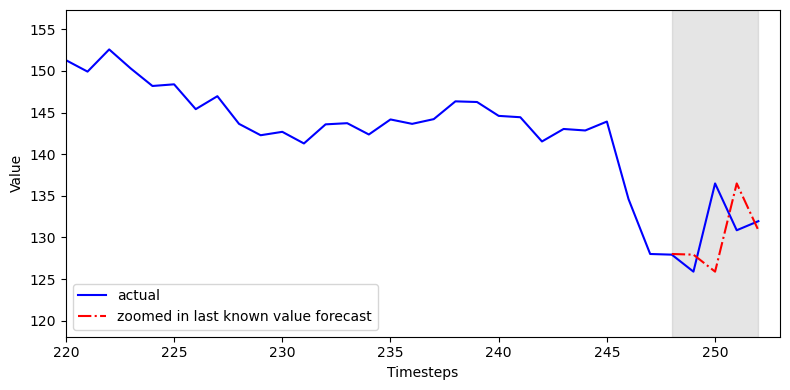

In [64]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(closing_prices['close'], 'b-', label='actual')
ax.plot(closing_prices_shift['close'].iloc[248:], 'r-.', label='zoomed in last known value forecast')

ax.axvspan(248, 252, color='#808080', alpha=0.2)

ax.legend(loc='best')

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.xlim(220, 253)
# plt.ylim(2200, 2400)
plt.tight_layout()
plt.show()

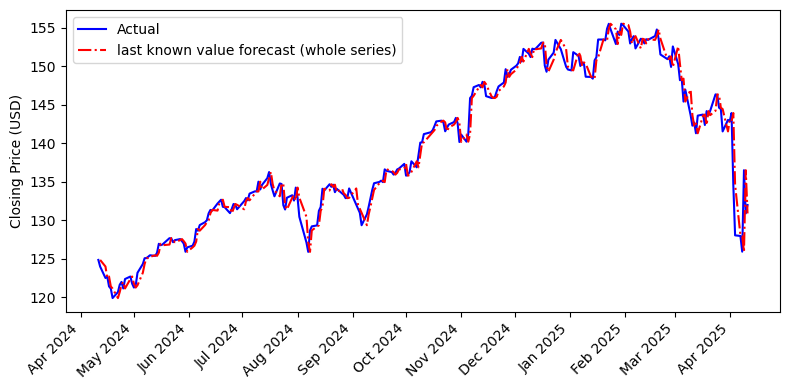

In [65]:
# Predict last value throughout the series (last known value forecast)

fig, ax = plt.subplots(figsize=(8, 4))

# Plot actual closing prices
ax.plot(closing_prices['date'], closing_prices['close'], 'b-', label='Actual')

# Plot shifted (forecast) values
ax.plot(closing_prices['date'], closing_prices_shift['close'], 'r-.', label='last known value forecast (whole series)')

# Add labels and legend
ax.legend(loc=2)
ax.set_xlabel('')
ax.set_ylabel('Closing Price (USD)')
plt.tight_layout()

# Format x-axis ticks to show Month and Year (e.g., "Apr 2024")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Optional: set major ticks to every month
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Rotate x-tick labels to avoid overlap
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()


## Calculating MSE for naive forecasts

In [66]:
mse_mean = round(mean_squared_error(test['close'], test['pred_mean']), 2)
mse_last = round(mean_squared_error(test['close'], test['pred_last']), 2)
mse_drift = round(mean_squared_error(test['close'], test['pred_drift']), 2)
mse_one_step = round(mean_squared_error(test['close'], closing_prices_shift['close'].iloc[248:]), 2)

print(mse_mean, mse_last, mse_drift, mse_one_step)

86.34 19.98 19.71 29.82


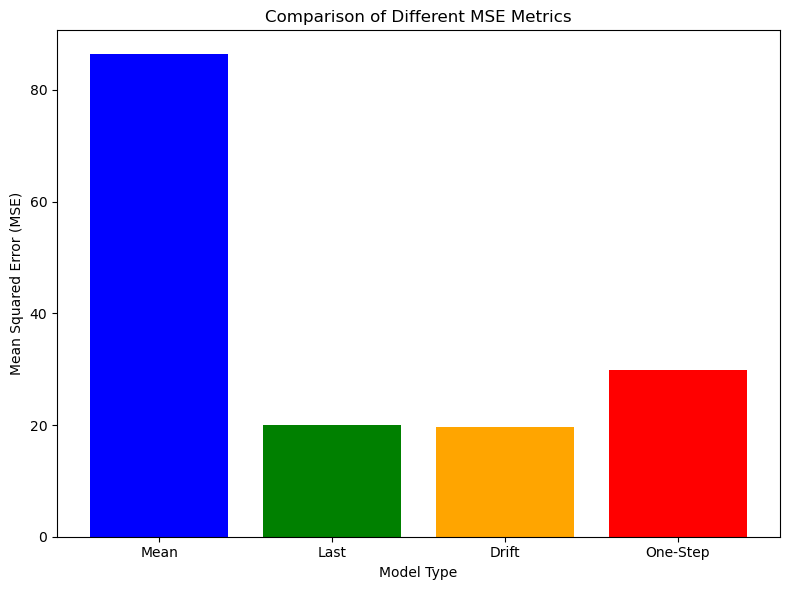

In [67]:
# MSE values
mse_values = [mse_mean, mse_last, mse_drift, mse_one_step]

# Labels for each MSE type
mse_labels = ['Mean', 'Last', 'Drift', 'One-Step']

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Bar plot for MSE values
ax.bar(mse_labels, mse_values, color=['blue', 'green', 'orange', 'red'])

# Adding labels and title
ax.set_xlabel('Model Type')
ax.set_ylabel('Mean Squared Error (MSE)')
ax.set_title('Comparison of Different MSE Metrics')

# Show the plot
plt.tight_layout()
plt.show()

From the MSE numbers above, it is clear that the best forecasting method was using last know value prediction throughout the series. Also, it is clear that if a random walk process must be forecast, it is better to make many short-term forecasts. That way, we do not allow for many random numbers to accumulate over time, which will degrade the quality of our forecasts in the long term.